In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# 2. Wczytanie i przygotowanie danych
# Wczytanie danych z dysku lokalnego
file_path = "C:/Users/User/Documents/NoD/breast+cancer+wisconsin+diagnostic/wdbc.data"  # Zmień na właściwą ścieżkę do pliku
column_names = ["id", "diagnosis"] + [f"feature_{i}" for i in range(1, 31)]
data = pd.read_csv(file_path, header=None, names=column_names)

# Przekształcenie etykiet na wartości numeryczne
label_encoder = LabelEncoder()
data["diagnosis"] = label_encoder.fit_transform(data["diagnosis"])  # Malignant = 1, Benign = 0

In [4]:
# Sprawdzenie rozkładu klas
print("Rozkład klas:")
print(data["diagnosis"].value_counts())

Rozkład klas:
diagnosis
0    357
1    212
Name: count, dtype: int64


In [5]:
# Sprawdzenie brakujących wartości
print("\nBrakujące wartości:")
print(data.isnull().sum())


Brakujące wartości:
id            0
diagnosis     0
feature_1     0
feature_2     0
feature_3     0
feature_4     0
feature_5     0
feature_6     0
feature_7     0
feature_8     0
feature_9     0
feature_10    0
feature_11    0
feature_12    0
feature_13    0
feature_14    0
feature_15    0
feature_16    0
feature_17    0
feature_18    0
feature_19    0
feature_20    0
feature_21    0
feature_22    0
feature_23    0
feature_24    0
feature_25    0
feature_26    0
feature_27    0
feature_28    0
feature_29    0
feature_30    0
dtype: int64


In [6]:
# Podział na cechy i etykiety
X = data.drop(columns=["id", "diagnosis"])
y = data["diagnosis"]

# 3. Podział danych na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizacja cech
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Implementacja i trening algorytmów klasyfikacyjnych
# Regresja logistyczna
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)

# Maszyna wektorów nośnych (SVM)
svm = SVC(probability=True)
svm.fit(X_train_scaled, y_train)

# k-Nearest Neighbors (kNN)
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)

# Dodatkowe klasyfikatory
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train_scaled, y_train)

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, y_train)

xgb = GradientBoostingClassifier(random_state=42)
xgb.fit(X_train_scaled, y_train)

# 5. Ocena jakości klasyfikatorów
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print("Macierz pomyłek:")
    print(conf_matrix)
    print("\n")

In [7]:
# Ocena wszystkich modeli
models = {
    "Logistic Regression": log_reg,
    "SVM": svm,
    "kNN": knn,
    "Decision Tree": tree,
    "Random Forest": rf,
    "XGBoost": xgb
}

for name, model in models.items():
    print(f"Wyniki dla {name}:")
    evaluate_model(model, X_test_scaled, y_test)

Wyniki dla Logistic Regression:
Accuracy: 0.9737
Precision: 0.9762
Recall: 0.9535
F1-Score: 0.9647
Macierz pomyłek:
[[70  1]
 [ 2 41]]


Wyniki dla SVM:
Accuracy: 0.9825
Precision: 1.0000
Recall: 0.9535
F1-Score: 0.9762
Macierz pomyłek:
[[71  0]
 [ 2 41]]


Wyniki dla kNN:
Accuracy: 0.9474
Precision: 0.9302
Recall: 0.9302
F1-Score: 0.9302
Macierz pomyłek:
[[68  3]
 [ 3 40]]


Wyniki dla Decision Tree:
Accuracy: 0.9474
Precision: 0.9302
Recall: 0.9302
F1-Score: 0.9302
Macierz pomyłek:
[[68  3]
 [ 3 40]]


Wyniki dla Random Forest:
Accuracy: 0.9649
Precision: 0.9756
Recall: 0.9302
F1-Score: 0.9524
Macierz pomyłek:
[[70  1]
 [ 3 40]]


Wyniki dla XGBoost:
Accuracy: 0.9561
Precision: 0.9524
Recall: 0.9302
F1-Score: 0.9412
Macierz pomyłek:
[[69  2]
 [ 3 40]]




In [8]:
# 6. Optymalizacja hiperparametrów
# Przykład dla SVM
param_grid = {
    "C": [0.1, 1, 10, 100],
    "gamma": [0.01, 0.1, 1, 10],
    "kernel": ["linear", "rbf"]
}

grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring="accuracy")
grid_search.fit(X_train_scaled, y_train)

print("Najlepsze parametry dla SVM:")
print(grid_search.best_params_)
print("Najlepszy wynik (accuracy):", grid_search.best_score_)

Najlepsze parametry dla SVM:
{'C': 0.1, 'gamma': 0.01, 'kernel': 'linear'}
Najlepszy wynik (accuracy): 0.9736263736263737


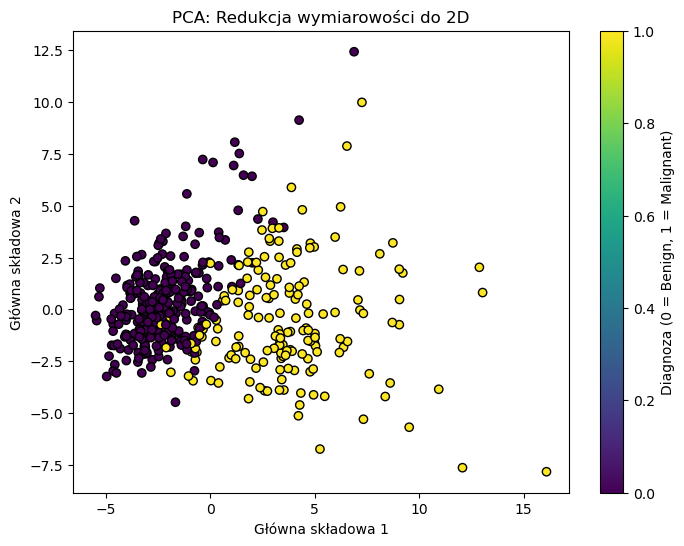

In [9]:
# 7. Redukcja wymiarowości (PCA)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_scaled)

# Wizualizacja PCA
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, cmap="viridis", edgecolor="k")
plt.title("PCA: Redukcja wymiarowości do 2D")
plt.xlabel("Główna składowa 1")
plt.ylabel("Główna składowa 2")
plt.colorbar(label="Diagnoza (0 = Benign, 1 = Malignant)")
plt.show()

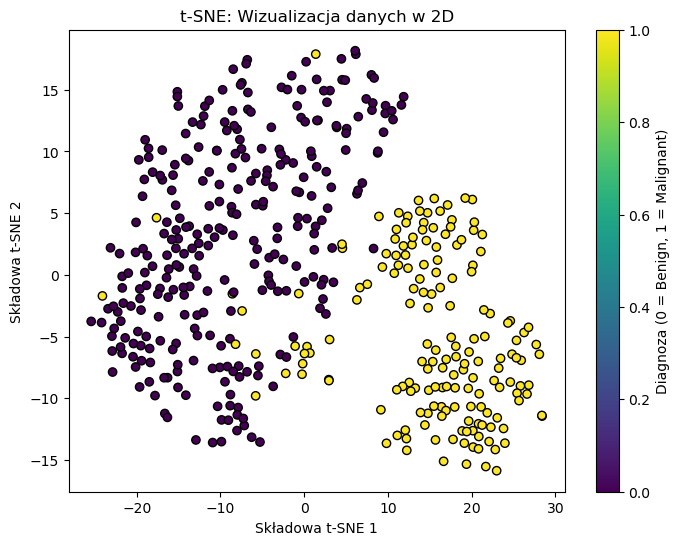

In [10]:
# 8. Wizualizacja wyników za pomocą t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_train_scaled)

# Wizualizacja t-SNE
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_train, cmap="viridis", edgecolor="k")
plt.title("t-SNE: Wizualizacja danych w 2D")
plt.xlabel("Składowa t-SNE 1")
plt.ylabel("Składowa t-SNE 2")
plt.colorbar(label="Diagnoza (0 = Benign, 1 = Malignant)")
plt.show()